Accuracy without scaling: 0.9200
Accuracy with scaling: 0.9200


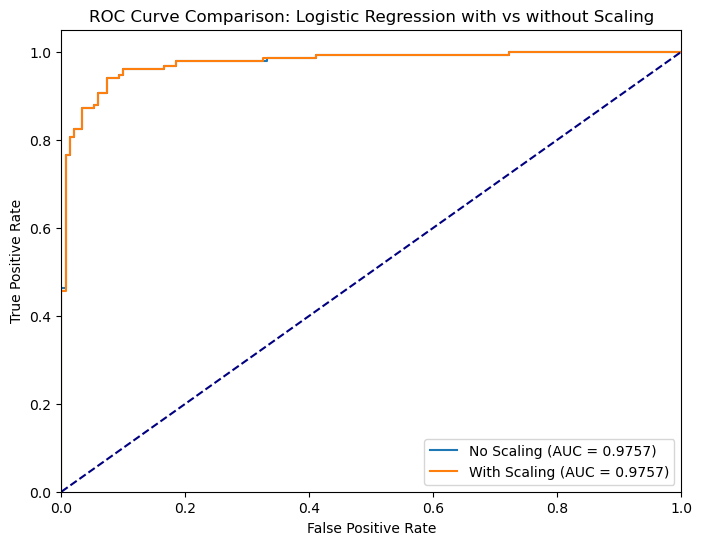

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc

# Step 1: Generate simulated data
X, y = make_classification(n_samples=1000, n_features=5, n_informative=3, n_redundant=2, random_state=42)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 2: Logistic Regression without Scaling
model_no_scaling = LogisticRegression()
model_no_scaling.fit(X_train, y_train)
y_pred_no_scaling = model_no_scaling.predict(X_test)

# Step 3: Logistic Regression with Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_with_scaling = LogisticRegression()
model_with_scaling.fit(X_train_scaled, y_train)
y_pred_with_scaling = model_with_scaling.predict(X_test_scaled)

# Step 4: Compare the accuracy
accuracy_no_scaling = accuracy_score(y_test, y_pred_no_scaling)
accuracy_with_scaling = accuracy_score(y_test, y_pred_with_scaling)

print(f"Accuracy without scaling: {accuracy_no_scaling:.4f}")
print(f"Accuracy with scaling: {accuracy_with_scaling:.4f}")

# Step 5: Plot ROC Curves for both models
fpr_no_scaling, tpr_no_scaling, _ = roc_curve(y_test, model_no_scaling.predict_proba(X_test)[:, 1])
fpr_with_scaling, tpr_with_scaling, _ = roc_curve(y_test, model_with_scaling.predict_proba(X_test_scaled)[:, 1])

roc_auc_no_scaling = auc(fpr_no_scaling, tpr_no_scaling)
roc_auc_with_scaling = auc(fpr_with_scaling, tpr_with_scaling)

plt.figure(figsize=(8, 6))
plt.plot(fpr_no_scaling, tpr_no_scaling, label=f'No Scaling (AUC = {roc_auc_no_scaling:.4f})')
plt.plot(fpr_with_scaling, tpr_with_scaling, label=f'With Scaling (AUC = {roc_auc_with_scaling:.4f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison: Logistic Regression with vs without Scaling')
plt.legend(loc="lower right")
plt.show()


In [2]:
accuracy_no_scaling

0.92

In [3]:
accuracy_with_scaling

0.92

Performance Comparison:
Accuracy without scaling: 0.9200, with scaling: 0.9200
Precision without scaling: 0.9371, with scaling: 0.9371
Recall without scaling: 0.8993, with scaling: 0.8993
F1-score without scaling: 0.9178, with scaling: 0.9178


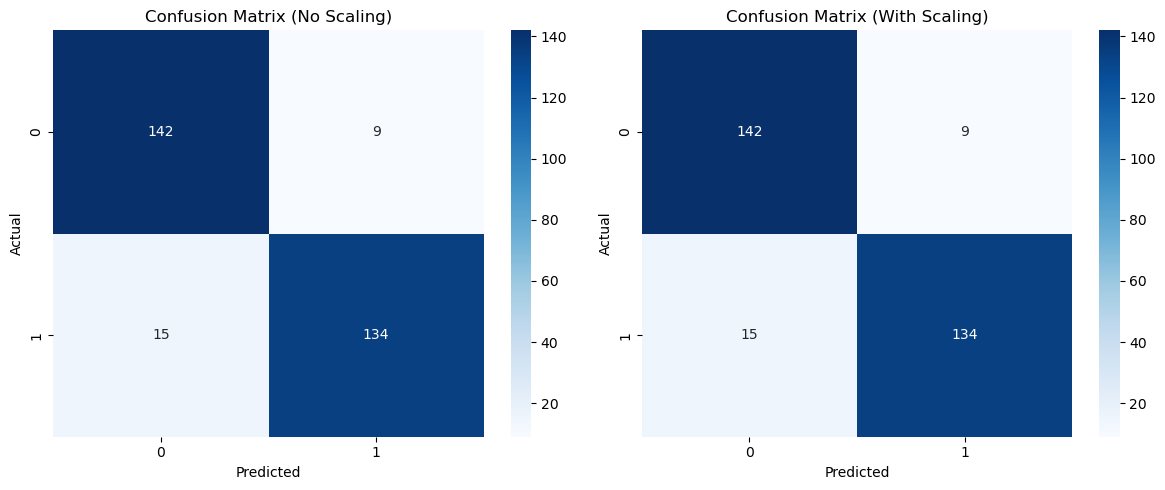


Feature Importance (Coefficients):
     Feature  Coefficient (No Scaling)  Coefficient (With Scaling)
0  Feature 0                  0.910808                    1.341590
1  Feature 1                  1.747056                    1.754636
2  Feature 2                  0.830115                    0.481296
3  Feature 3                  0.162941                    0.666915
4  Feature 4                 -0.904923                   -1.116060


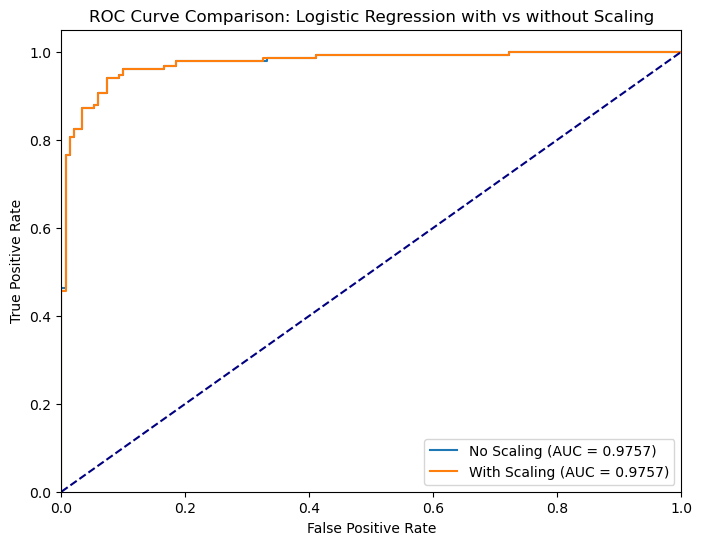

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc

# Step 1: Generate simulated data
X, y = make_classification(n_samples=1000, n_features=5, n_informative=3, n_redundant=2, random_state=42)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 2: Logistic Regression without Scaling
model_no_scaling = LogisticRegression()
model_no_scaling.fit(X_train, y_train)
y_pred_no_scaling = model_no_scaling.predict(X_test)

# Step 3: Logistic Regression with Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_with_scaling = LogisticRegression()
model_with_scaling.fit(X_train_scaled, y_train)
y_pred_with_scaling = model_with_scaling.predict(X_test_scaled)

# Step 4: Compare accuracy, precision, recall, and F1-score
accuracy_no_scaling = accuracy_score(y_test, y_pred_no_scaling)
accuracy_with_scaling = accuracy_score(y_test, y_pred_with_scaling)

precision_no_scaling = precision_score(y_test, y_pred_no_scaling)
precision_with_scaling = precision_score(y_test, y_pred_with_scaling)

recall_no_scaling = recall_score(y_test, y_pred_no_scaling)
recall_with_scaling = recall_score(y_test, y_pred_with_scaling)

f1_no_scaling = f1_score(y_test, y_pred_no_scaling)
f1_with_scaling = f1_score(y_test, y_pred_with_scaling)

print("Performance Comparison:")
print(f"Accuracy without scaling: {accuracy_no_scaling:.4f}, with scaling: {accuracy_with_scaling:.4f}")
print(f"Precision without scaling: {precision_no_scaling:.4f}, with scaling: {precision_with_scaling:.4f}")
print(f"Recall without scaling: {recall_no_scaling:.4f}, with scaling: {recall_with_scaling:.4f}")
print(f"F1-score without scaling: {f1_no_scaling:.4f}, with scaling: {f1_with_scaling:.4f}")

# Step 5: Confusion Matrix Visualization
conf_matrix_no_scaling = confusion_matrix(y_test, y_pred_no_scaling)
conf_matrix_with_scaling = confusion_matrix(y_test, y_pred_with_scaling)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(conf_matrix_no_scaling, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title("Confusion Matrix (No Scaling)")
ax[0].set_xlabel("Predicted")
ax[0].set_ylabel("Actual")

sns.heatmap(conf_matrix_with_scaling, annot=True, fmt='d', cmap='Blues', ax=ax[1])
ax[1].set_title("Confusion Matrix (With Scaling)")
ax[1].set_xlabel("Predicted")
ax[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()

# Step 6: Feature Coefficients
coefficients_no_scaling = model_no_scaling.coef_[0]
coefficients_with_scaling = model_with_scaling.coef_[0]

feature_names = [f"Feature {i}" for i in range(X.shape[1])]
coef_df = pd.DataFrame({
    "Feature": feature_names,
    "Coefficient (No Scaling)": coefficients_no_scaling,
    "Coefficient (With Scaling)": coefficients_with_scaling
})

print("\nFeature Importance (Coefficients):")
print(coef_df)

# Step 7: ROC Curves for both models
fpr_no_scaling, tpr_no_scaling, _ = roc_curve(y_test, model_no_scaling.predict_proba(X_test)[:, 1])
fpr_with_scaling, tpr_with_scaling, _ = roc_curve(y_test, model_with_scaling.predict_proba(X_test_scaled)[:, 1])

roc_auc_no_scaling = auc(fpr_no_scaling, tpr_no_scaling)
roc_auc_with_scaling = auc(fpr_with_scaling, tpr_with_scaling)

plt.figure(figsize=(8, 6))
plt.plot(fpr_no_scaling, tpr_no_scaling, label=f'No Scaling (AUC = {roc_auc_no_scaling:.4f})')
plt.plot(fpr_with_scaling, tpr_with_scaling, label=f'With Scaling (AUC = {roc_auc_with_scaling:.4f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison: Logistic Regression with vs without Scaling')
plt.legend(loc="lower right")
plt.show()


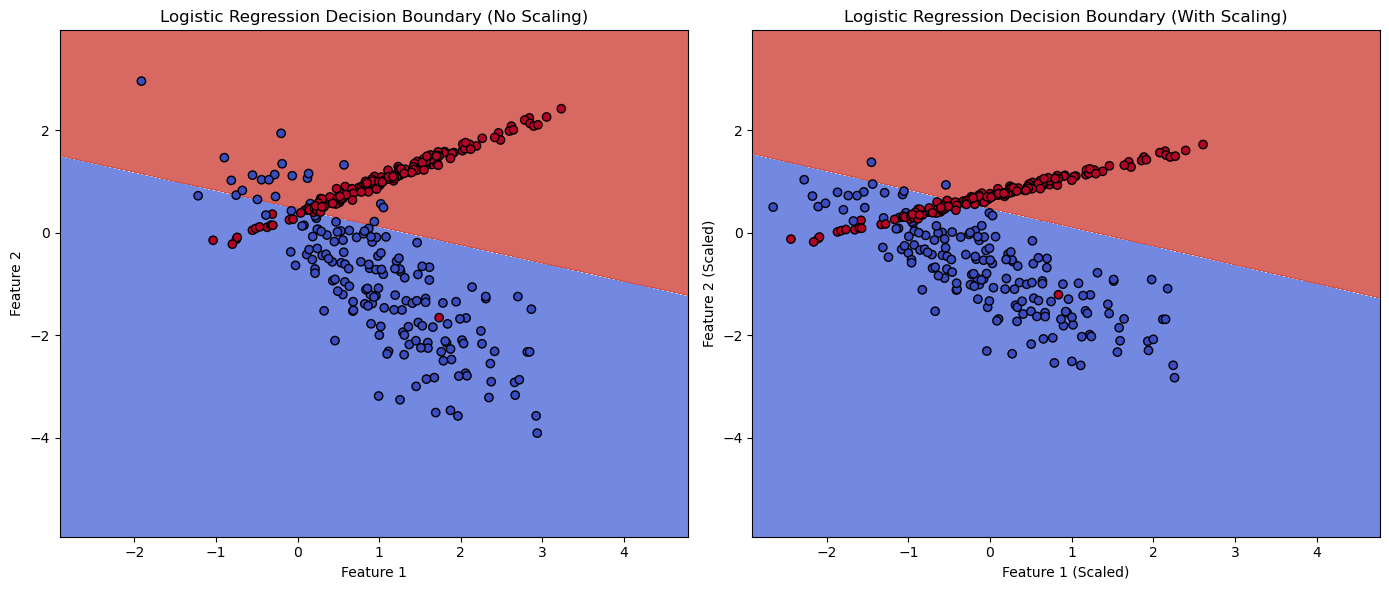

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Step 1: Generate a 2D simulated dataset
X, y = make_classification(n_samples=500, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)

# Step 2: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Logistic Regression without Scaling
model_no_scaling = LogisticRegression()
model_no_scaling.fit(X_train, y_train)

# Step 4: Logistic Regression with Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_with_scaling = LogisticRegression()
model_with_scaling.fit(X_train_scaled, y_train)

# Step 5: Plot decision boundaries

# Create a mesh to plot in 2D
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Plot decision boundary for model without scaling
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
Z_no_scaling = model_no_scaling.predict(np.c_[xx.ravel(), yy.ravel()])
Z_no_scaling = Z_no_scaling.reshape(xx.shape)
plt.contourf(xx, yy, Z_no_scaling, alpha=0.8, cmap=plt.cm.coolwarm)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', marker='o', cmap=plt.cm.coolwarm)
plt.title('Logistic Regression Decision Boundary (No Scaling)')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Plot decision boundary for model with scaling
plt.subplot(1, 2, 2)
Z_with_scaling = model_with_scaling.predict(scaler.transform(np.c_[xx.ravel(), yy.ravel()]))
Z_with_scaling = Z_with_scaling.reshape(xx.shape)
plt.contourf(xx, yy, Z_with_scaling, alpha=0.8, cmap=plt.cm.coolwarm)
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, edgecolors='k', marker='o', cmap=plt.cm.coolwarm)
plt.title('Logistic Regression Decision Boundary (With Scaling)')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('Feature 1 (Scaled)')
plt.ylabel('Feature 2 (Scaled)')

plt.tight_layout()
plt.show()
